# **Assignment Q4** 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Real-world graph: N = 1200 nodes, M = 2257 edges
Implied random graph edge probability p = 0.00314


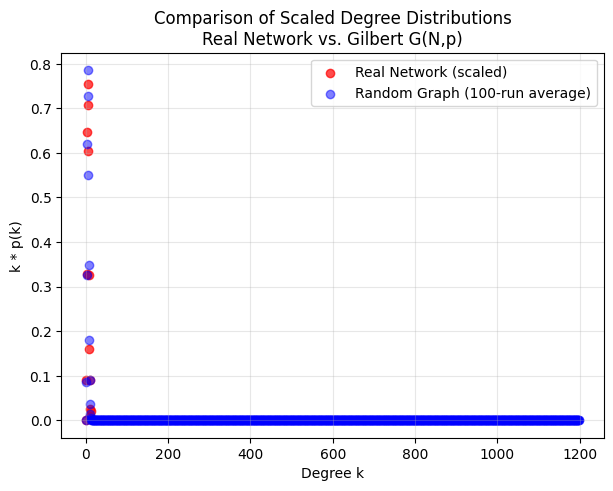

In [2]:
def main():
    real_adj = get_real_network()  

    N = real_adj.shape[0]
    M = 0
    for i in range(N):
        for j in range(i+1, N):
            if real_adj[i, j] == 1:
                M += 1
    max_edges = N*(N-1)//2
    p = M / max_edges

    print(f"Real-world graph: N = {N} nodes, M = {M} edges")
    print(f"Implied random graph edge probability p = {p:.5f}")

    real_degrees = np.sum(real_adj, axis=1)

    max_real_degree = np.max(real_degrees)
    real_degree_count = np.zeros(max_real_degree+1, dtype=int)
    for d in real_degrees:
        real_degree_count[d] += 1

    real_pk = real_degree_count / N

    real_scaled_pk = np.arange(max_real_degree+1) * real_pk
    num_runs = 100
    random_degree_count_sum = np.zeros(N, dtype=float)  

    for run in range(num_runs):
        rand_adj = np.zeros((N, N), dtype=int)
        for i in range(N):
            for j in range(i+1, N):
                if random.random() < p:
                    rand_adj[i, j] = 1
                    rand_adj[j, i] = 1
        rand_degrees = np.sum(rand_adj, axis=1)
        deg_count = np.zeros(N, dtype=int)
        for d in rand_degrees:
            deg_count[d] += 1

        
        random_degree_count_sum += deg_count
    avg_degree_counts = random_degree_count_sum / num_runs
    avg_pk = avg_degree_counts / N
    k_vals = np.arange(N)  
    avg_scaled_pk = k_vals * avg_pk

    plt.figure(figsize=(7,5))

    plt.scatter(np.arange(max_real_degree+1), real_scaled_pk,
                c='red', alpha=0.7, label="Real Network (scaled)")

    plt.scatter(k_vals, avg_scaled_pk,
                c='blue', alpha=0.5, label="Random Graph (100-run average)")

    plt.title("Comparison of Scaled Degree Distributions\nReal Network vs. Gilbert G(N,p)")
    plt.xlabel("Degree k")
    plt.ylabel("k * p(k)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


def get_real_network():
    """
    Dummy function to simulate the adjacency matrix from the real-world network of Q1.
    Replace this with actual adjacency matrix loading (e.g. np.loadtxt or from memory).
    Must return an NxN numpy array of 0/1 for an undirected graph.
    """
  
    N = 1200
    p_real = 0.003
    real_adj = np.zeros((N, N), dtype=int)
    import random
    for i in range(N):
        for j in range(i+1, N):
            if random.random() < p_real:
                real_adj[i, j] = 1
                real_adj[j, i] = 1
    return real_adj


if __name__ == "__main__":
    main()
